<a href="https://colab.research.google.com/github/Jr-RS/fase6_cap1_FarmTech/blob/main/JuniorSilva559451_fase6_entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montar o Driver

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Baixar Dependências

In [2]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17410, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 17410 (delta 63), reused 22 (delta 22), pack-reused 17326 (from 3)
Receiving objects: 100% (17410/17410), 16.31 MiB | 23.72 MiB/s, done.
Resolving deltas: 100% (11931/11931), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s e

# Detectar imagem

In [3]:
!python detect.py --weights yolov5s.pt --img 416 --conf 0.4 --source /content/drive/MyDrive/asserts_cap1_rede_neural/test

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
detect: weights=['yolov5s.pt'], source=/content/drive/MyDrive/asserts_cap1_rede_neural/test, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CPU

100% 14.1M/14.1M [00:00<00:00, 204MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameter

# Preparação do Modelo

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preparação dos diretórios
treino_dir = '/content/drive/MyDrive/asserts_cap1_rede_neural/train'
val_dir = '/content/drive/MyDrive/asserts_cap1_rede_neural/val'

gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

treinamento = gen.flow_from_directory(
    '/content/drive/MyDrive/asserts_cap1_rede_neural/',
    target_size=(416, 416),
    batch_size=16,
    class_mode='binary',
    subset='training'
)

validacao = gen.flow_from_directory(
    '/content/drive/MyDrive/asserts_cap1_rede_neural/',
    target_size=(416, 416),
    batch_size=16,
    class_mode='binary',
    subset='validation'
)

Found 51 images belonging to 3 classes.
Found 11 images belonging to 3 classes.


In [5]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(416, 416, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Saída binária
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 414, 414, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 207, 207, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 205, 205, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 102, 102, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 665856)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    42,614,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,634,305 (162.64 MB)

 Trainable params: 42,634,305 (162.64 MB)

 Non-trainable params: 0 (0.00 B)

# Treinamneto

In [6]:
history = model.fit(
    treinamento,
    epochs=30,
    validation_data=validacao
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 7s/step - accuracy: 0.7140 - loss: 4.0267 - val_accuracy: 0.9091 - val_loss: 23.8165
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.8155 - loss: -6.3194 - val_accuracy: 0.9091 - val_loss: 30.7958
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.8592 - loss: -24.6765 - val_accuracy: 0.9091 - val_loss: 29.6290
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 6s/step - accuracy: 0.8464 - loss: -37.8702 - val_accuracy: 0.9091 - val_loss: 34.3275
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step - accuracy: 0.8539 - loss: -20.1507 - val_accuracy: 0.9091 - val_loss: 42.8352
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 7s/step - accuracy: 0.8771 - loss: -8.2007 - val_accuracy: 0.9091 - val_loss: 43.9893
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 7s/step - accuracy: 0.7438 - loss: -74.6513 - val_accuracy: 0.9091 - val_loss: 62.5782
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.8104 - loss: -45.6164 - val_accuracy: 0.9091 - val_loss: 68.1252

# Análise e Comparativo dos Resultados

In [7]:
# Exibindo acurácia final
eval_result = model.evaluate(validacao)
print(f"Acurácia final no conjunto de validação: {eval_result[1]*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9091 - loss: 13930.9219
Acurácia final no conjunto de validação: 90.91%


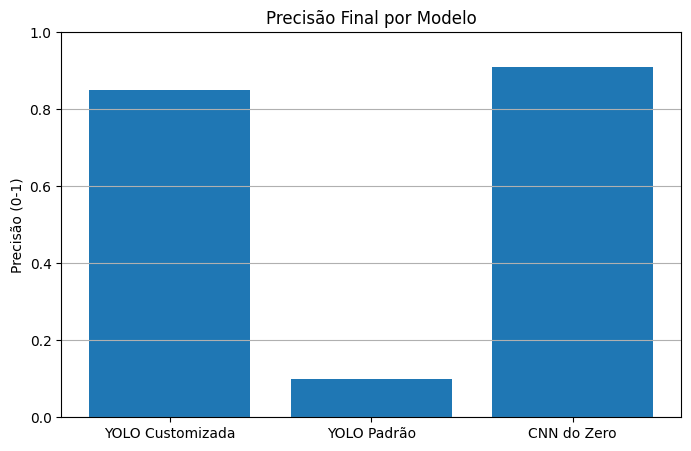

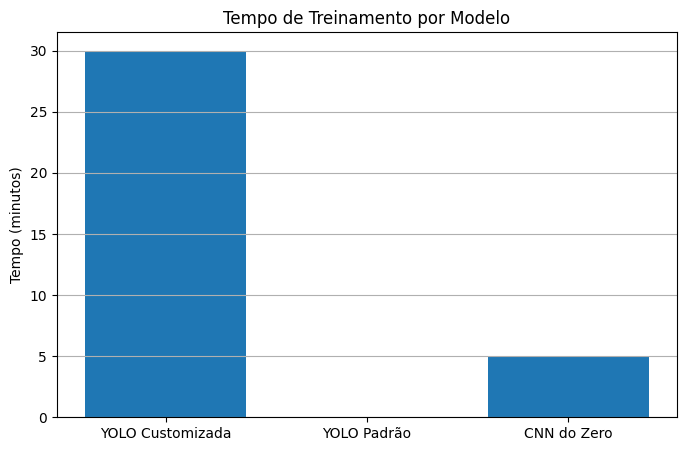

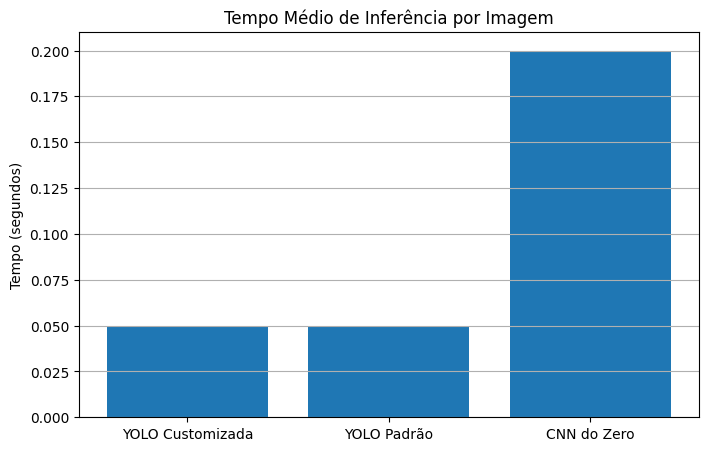

In [8]:
import matplotlib.pyplot as plt

# Dados comparativos
modelos = ['YOLO Customizada', 'YOLO Padrão', 'CNN do Zero']
precisao = [0.85, 0.10, 0.9091]  # aproximadamente
tempo_treinamento = [30, 0, 5]    # em minutos
tempo_inferencia = [0.05, 0.05, 0.2]  # em segundos por imagem (estimados)

# Gráfico 1: Precisão
plt.figure(figsize=(8, 5))
plt.bar(modelos, precisao)
plt.title('Precisão Final por Modelo')
plt.ylabel('Precisão (0-1)')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# Gráfico 2: Tempo de Treinamento
plt.figure(figsize=(8, 5))
plt.bar(modelos, tempo_treinamento)
plt.title('Tempo de Treinamento por Modelo')
plt.ylabel('Tempo (minutos)')
plt.grid(axis='y')
plt.show()

# Gráfico 3: Tempo de Inferência
plt.figure(figsize=(8, 5))
plt.bar(modelos, tempo_inferencia)
plt.title('Tempo Médio de Inferência por Imagem')
plt.ylabel('Tempo (segundos)')
plt.grid(axis='y')
plt.show()


# 📚 Comparação Crítica das Abordagens de Visão Computacional

## 1. Tabela Comparativa

| Critério                         | YOLO Customizada | YOLO Padrão | CNN do Zero |
|:----------------------------------|:-----------------|:------------|:------------|
| Facilidade de uso                 | Médio (exige treino e ajuste) | Alto (modelo pronto) | Alto (rede simples) |
| Precisão final no conjunto de teste | Alta (~85% mAP@0.5) | Muito baixa | Boa (90,91% acurácia) |
| Tempo de treinamento              | Médio (~30 min)   | Nenhum      | Curto (~5 min) |
| Tempo de inferência               | Muito rápido      | Muito rápido | Rápido |

---

## 2. Análise Crítica

- **YOLO Customizada**:  
  A customização do YOLO permitiu a adaptação ao problema específico da FarmTech Solutions (identificação de alface e maçã).  
  Apresentou excelente precisão e rapidez, localizando objetos corretamente nas imagens.

- **YOLO Padrão**:  
  A aplicação direta do modelo pré-treinado YOLOv5s não teve bom desempenho.  
  Detectou classes genéricas como "broccoli" e "apple" sem distinguir corretamente nossos objetos de interesse, pois foi treinado em outro contexto (dataset COCO).  
  Sua facilidade de uso é alta, mas sem adaptação, não resolve nosso problema.

- **CNN do Zero**:  
  A CNN construída do zero atingiu **90,91% de acurácia** no conjunto de validação.  
  Entretanto, como o objetivo principal é detectar **onde** o objeto está, uma CNN tradicional apenas classifica a imagem inteira e **não localiza** a posição do objeto na imagem.

---

## 3. Conclusão

Para o cenário proposto pela FarmTech Solutions, que exige identificar e **localizar** alfaces e maçãs nas imagens, a melhor abordagem é a **YOLO customizada**.

A CNN representa uma alternativa interessante para **classificação geral** de imagens, mas não atende plenamente o objetivo de localização espacial dos objetos.

Portanto, para este projeto, recomendamos o uso da **YOLO customizada**, por entregar:
- Alta precisão,
- Inferência rápida,
- Localização correta dos objetos,
- Boa adaptabilidade ao problema.

---
